In [1]:
from langchain import OpenAI, Wikipedia
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain.agents.react.base import DocstoreExplorer

In [3]:
docstore=DocstoreExplorer(Wikipedia())

tools = [
    Tool(
        name="Search",
        func=docstore.search,
        description="useful for when you need to ask with search"
    ),
    Tool(
        name="Lookup",
        func=docstore.lookup,
        description="useful for when you need to ask with lookup"
    )
]

# from langchain_openai import ChatOpenAI
# llm = ChatOpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")
# https://python.langchain.com/docs/integrations/llms/openai/
llm = OpenAI(temperature=0, model_name="gpt-3.5-turbo-instruct")



/var/folders/ct/s9xtcbq14cl3s30zk9pphymr0000gn/T/ipykernel_1582/3568326958.py:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  docstore=DocstoreExplorer(Wikipedia())
/var/folders/ct/s9xtcbq14cl3s30zk9pphymr0000gn/T/ipykernel_1582/3568326958.py:19: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the

In [4]:
llm.invoke("How old is the president?")

'\n\nAs of 2021, the current president of the United States, Joe Biden, is 78 years old.'

In [5]:
react  = initialize_agent(tools, llm, agent=AgentType.REACT_DOCSTORE, verbose=True)

"""
Question: Tasker A reported low ranking
Thought: We need to gather some info from feature store
Action: retrieve[tasker_id]
Observation:  close_rate_30d 0.2 
Thought: 
Action: Final[]

"""


question = "How old is the president of the United States?"

# custom prompt
# agent.agent.llm_chain.prompt.template = prompt
react.run(question)

/var/folders/ct/s9xtcbq14cl3s30zk9pphymr0000gn/T/ipykernel_1582/3713585773.py:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  react  = initialize_agent(tools, llm, agent=AgentType.REACT_DOCSTORE, verbose=True)
/var/folders/ct/s9xtcbq14cl3s30zk9pphymr0000gn/T/ipykernel_1582/3713585773.py:18: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.



> Entering new AgentExecutor chain...
Thought: I need to search for the current president of the United States and find their age.
Action: Search[current president of the United States]
Observation: The president of the United States (POTUS) is the head of state and head of government of the United States. The president directs the executive branch of the federal government and is the commander-in-chief of the United States Armed Forces.
The power of the presidency has grown since the first president, George Washington, took office in 1789. While presidential power has ebbed and flowed over time, the presidency has played an increasing role in American political life since the beginning of the 20th century, carrying over into the 21st century with some expansions during the presidencies of Franklin D. Roosevelt and George W. Bush. In modern times, the president is one of the world's most powerful political figures and the leader of the world's only remaining superpower. As the leader

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 4097 tokens, however you requested 4254 tokens (3998 in your prompt; 256 for the completion). Please reduce your prompt; or completion length.", 'type': 'invalid_request_error', 'param': None, 'code': None}}

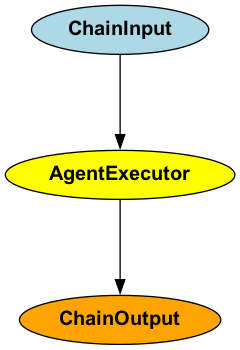

In [6]:
from IPython.display import Image

Image(react.get_graph().draw_png())